In [25]:
import pandas as pd
import matplotlib as ml
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys
import time
import os
import tensorflow as tf
from tensorflow import keras
import sklearn

print(sys.version_info)
for lib in (pd, tf, np, ml, sklearn, keras):
    print(lib.__name__, lib.__version__)
    
    

sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
pandas 1.0.1
tensorflow 2.0.1
numpy 1.18.1
matplotlib 3.1.3
sklearn 0.22.1
tensorflow_core.keras 2.2.4-tf


In [37]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_valid = x_train_all[5000:], x_train_all[:5000]
y_train, y_valid = y_train_all[5000:], y_train_all[:5000]
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


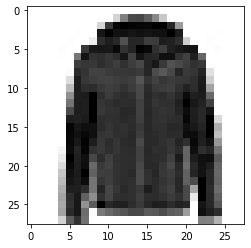

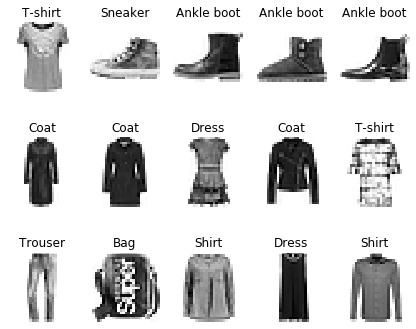

In [23]:
def show_image(img_arr):
    plt.imshow(img_arr, cmap = "binary")
    plt.show()
    
show_image(x_train[0])

def show_images(n_rows, n_cols, x_data, y_data, labels):
    assert(len(x_data) == len(y_data))
    assert(n_rows * n_cols < len(x_data))
    plt.figure(figsize=(n_rows *2.4, n_cols * 1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = row * n_cols + col + 1
            plt.subplot(n_rows, n_cols, index)
            plt.imshow(x_data[index], cmap="binary", interpolation="nearest")
            plt.axis("off")
            plt.title(labels[y_data[index]])
    plt.show()
    
labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
show_images(3, 5, x_train, y_train, labels)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [45]:
#from keras.models import Sequential
#from keras.layers import Dense, Flatten, AlphaDropout
#from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
for _ in range(10):
    model.add(keras.layers.Dense(256, activation="selu"))
model.add(keras.layers.AlphaDropout(rate=0.5))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
logdir = "./callbacks"
if not os.path.exists(logdir):
    os.mkdir(logdir)
model_file = os.path.join(logdir, "my_classfication_model.h5")
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.EarlyStopping(patience=3, min_delta=1e-2),
    keras.callbacks.ModelCheckpoint(model_file, save_best_only=True)
]
history = model.fit(x_train_scaled, y_train, validation_data = (x_valid_scaled, y_valid), epochs = 25, callbacks= callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 11s 196us/sample - loss: 0.5770 - accuracy: 0.7969 - val_loss: 0.6876 - val_accuracy: 0.8482
Epoch 2/25
55000/55000 [==============================] - 11s 205us/sample - loss: 0.4019 - accuracy: 0.8562 - val_loss: 0.5017 - val_accuracy: 0.8740
Epoch 3/25
55000/55000 [==============================] - 11s 203us/sample - loss: 0.3593 - accuracy: 0.8695 - val_loss: 0.4612 - val_accuracy: 0.8746
Epoch 4/25
55000/55000 [==============================] - 12s 210us/sample - loss: 0.3307 - accuracy: 0.8785 - val_loss: 0.5603 - val_accuracy: 0.8718
Epoch 5/25
55000/55000 [==============================] - 10s 179us/sample - loss: 0.3074 - accuracy: 0.8866 - val_loss: 0.6273 - val_accuracy: 0.8658
Epoch 6/25
55000/55000 [==============================] - 11s 203us/sample - loss: 0.2924 - accuracy: 0.8910 - val_loss: 0.4965 - val_accuracy: 0.8824


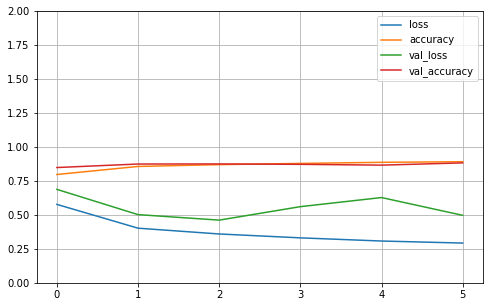

In [46]:
def print_train_curve(history):
    pd.DataFrame(history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()
print_train_curve(history.history)

In [47]:
model.evaluate(x_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.5649239666759968, 0.8701]